In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import arviz as az

[]

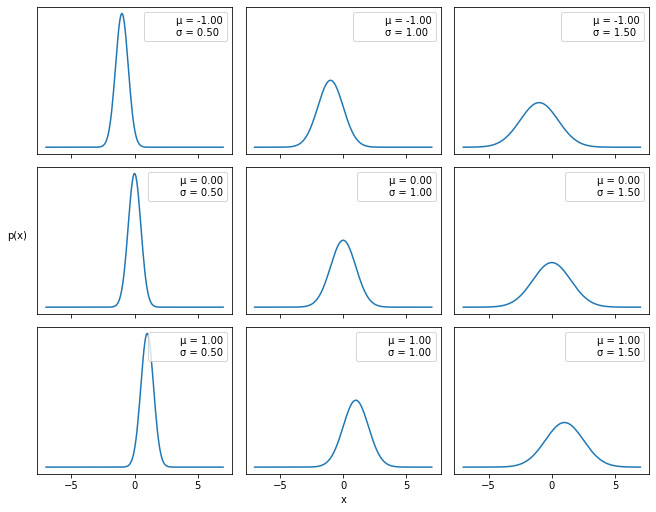

In [6]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, num=200)
_, subplots = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for mu_index in range(len(mu_params)):
    for sd_index in range(len(sd_params)):
        mu = mu_params[mu_index]
        sd = sd_params[sd_index]
        y = stats.norm(mu, sd).pdf(x)
        subplots[mu_index,sd_index].plot(x, y)
        subplots[mu_index,sd_index].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, sd), alpha=0)
        subplots[mu_index,sd_index].legend(loc=1)
subplots[2,1].set_xlabel('x')
subplots[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
subplots[1,0].set_yticks([])

In [5]:

ls = np.linspace(-1, 1, 7)
print(ls)

[-1.         -0.66666667 -0.33333333  0.          0.33333333  0.66666667
  1.        ]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1222b6f28>],
      dtype=object)

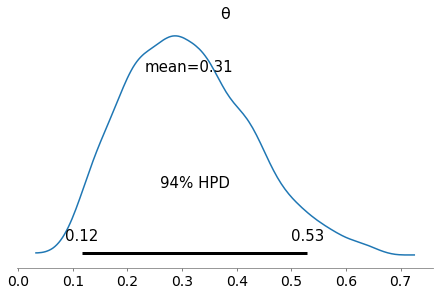

In [17]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

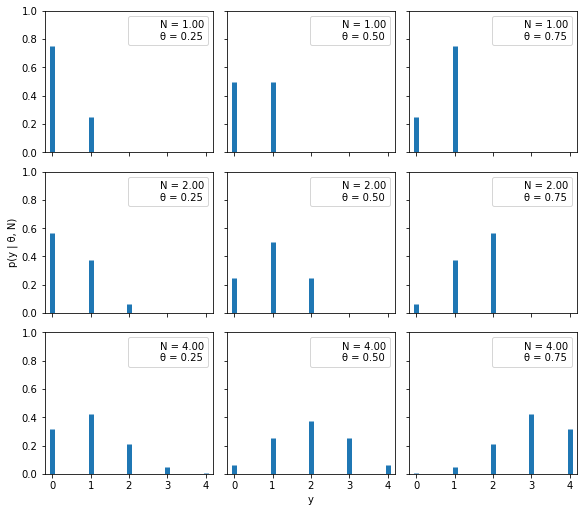

In [18]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)
        

Text(0.07, 0.5, 'p(θ)')

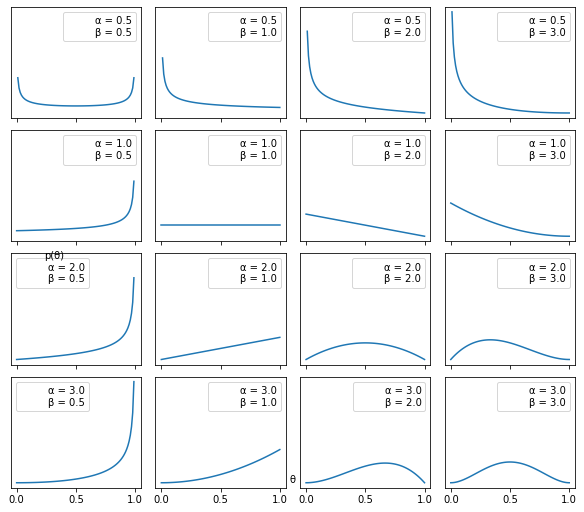

In [20]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a, b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)
